In [1]:
# Import dependencies
import pandas as pd
import numpy as np
#import hvplot.pandas
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import clear_output

In [2]:
# Loads the data into a DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/skronheim/project-4/main/Resources/dataset.csv")

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
df["track_name"] = df["track_name"].astype('str')

In [4]:
df["artists"] = df["artists"].astype('str')

In [5]:
df["Artist + Song"] = df[["artists", "track_name"]].apply("-".join, axis=1)

In [21]:
features = ["popularity","energy"]

In [22]:
df = df.dropna(subset=features)

In [23]:
df_clean = df.drop(["Unnamed: 0","track_id", "time_signature", "artists", "track_name"], axis=1)
df_clean.head()

,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Artist + Song
0,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic,Gen Hoshino-Comedy
1,Ghost (Acoustic),55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic,Ben Woodward-Ghost - Acoustic
2,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic,Ingrid Michaelson;ZAYN-To Begin Again
3,Crazy Rich Asians (Original Motion Picture Sou...,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic,Kina Grannis-Can't Help Falling In Love
4,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic,Chord Overstreet-Hold On


In [24]:
df_clean.set_index("Artist + Song", inplace = True)
df_clean.head()

,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
Artist + Song,,,,,,,,,,,,,,,,
Gen Hoshino-Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
Ben Woodward-Ghost - Acoustic,Ghost (Acoustic),55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
Ingrid Michaelson;ZAYN-To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
Kina Grannis-Can't Help Falling In Love,Crazy Rich Asians (Original Motion Picture Sou...,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
Chord Overstreet-Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


In [25]:
data = df_clean[features].copy()
data.head()

,popularity,energy
Artist + Song,,
Gen Hoshino-Comedy,73,0.4610
Ben Woodward-Ghost - Acoustic,55,0.1660
Ingrid Michaelson;ZAYN-To Begin Again,57,0.3590
Kina Grannis-Can't Help Falling In Love,71,0.0596
Chord Overstreet-Hold On,82,0.4430


In [26]:
data_scaled = StandardScaler().fit_transform(
    data)

In [27]:
 # Create a DataFrame with the scaled data
df_data_scaled = pd.DataFrame(
    data_scaled,
    columns= data.columns
)

# Copy the tickers names from the original data
df_data_scaled["Artist + Song"] = data.index

# Set the Ticker column as index
df_data_scaled = df_data_scaled.set_index("Artist + Song")

# Display sample data
df_data_scaled.head()

,popularity,energy
Artist + Song,,
Gen Hoshino-Comedy,1.782627,-0.717148
Ben Woodward-Ghost - Acoustic,0.975633,-1.889980
Ingrid Michaelson;ZAYN-To Begin Again,1.065299,-1.122669
Kina Grannis-Can't Help Falling In Love,1.692961,-2.312994
Chord Overstreet-Hold On,2.186125,-0.788711


In [28]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_data_scaled)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,k,inertia
0,1,228000.000000
1,2,146068.918221
2,3,86338.665104
3,4,64284.098879
4,5,52539.037125


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

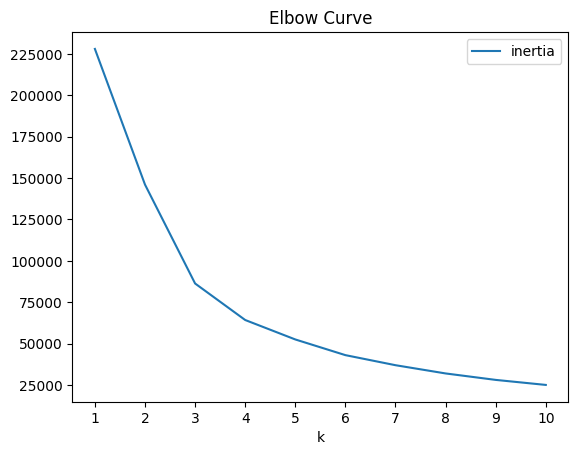

In [29]:
# Plot the DataFrame
df_elbow.plot(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

In [30]:
 # Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=4)

# Fit the model for the df_stocks_pca DataFrame
model.fit(df_data_scaled)

# Predict the model segments (clusters)
artist_clusters = model.predict(df_data_scaled)

# Print the stock segments
print(artist_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 3 ... 1 3 1]


In [31]:
 # Create a copy of the df_stocks_pca DataFrame and name it as df_stocks_pca_predictions
df_data_scaled_predictions = df_data_scaled.copy()

# Create a new column in the DataFrame with the predicted clusters
df_data_scaled_predictions["Artist+SongCluster"] = artist_clusters

# Review the DataFrame
df_data_scaled_predictions.head()

,popularity,energy,Artist+SongCluster
Artist + Song,,,
Gen Hoshino-Comedy,1.782627,-0.717148,3
Ben Woodward-Ghost - Acoustic,0.975633,-1.889980,3
Ingrid Michaelson;ZAYN-To Begin Again,1.065299,-1.122669,3
Kina Grannis-Can't Help Falling In Love,1.692961,-2.312994,3
Chord Overstreet-Hold On,2.186125,-0.788711,3


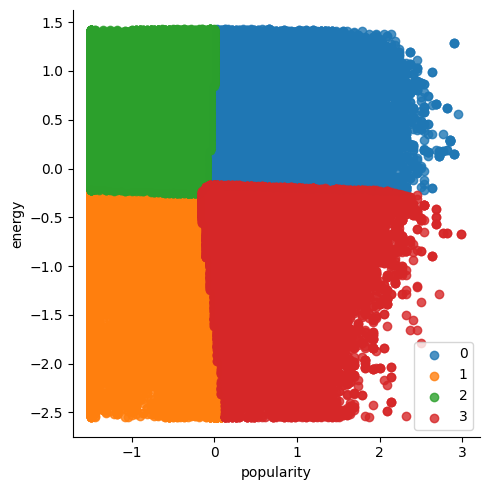

In [33]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt


# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="popularity", y="energy", data=df_data_scaled_predictions, fit_reg=False, hue='Artist+SongCluster', legend=False)

# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

plt.show()

In [34]:
df_data_scaled_predictions[df_data_scaled_predictions["Artist+SongCluster"]== 0].index

Index(['Ross Copperman-Hunger', 'Chord Overstreet;Deepend-Hold On - Remix',
       'Motohiro Hata-透明だった世界', 'Andrew Belle-Pieces',
       'Andrew Belle-The Enemy', 'Andrew Belle-Sky's Still Blue',
       'Ingrid Michaelson-Light Me Up', 'A Great Big World-Kaleidoscope',
       'Jason Mraz-Have It All', 'Sara Bareilles-Brave',
       ...
       'Bethel Music;Molly Skaggs-Ain’t No Grave - Live',
       'Hillsong Worship;Hillsong Young & Free-This Is Living',
       'Urban Rescue-Alive In You', 'I AM THEY-Amen',
       'Planetshakers-Heaven Is My Home - Live',
       'Planetshakers-Come Holy Spirit', 'Planetshakers-All My Life - Live',
       'Planetshakers-Stay (You Are Good) - Live',
       'Jesus Culture-Your Love Never Fails',
       'Chris Tomlin-How Can I Keep From Singing'],
      dtype='object', name='Artist + Song', length=36106)